# multiscale model fitting for Toy3a



### start with initalizing many things

In [3]:
# imports
import os
import sys
import torch
# import pickle
import numpy as np
import matplotlib.pyplot as plt
# from tqdm.notebook import tqdm
# import time
import math

module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
# import torch_cae_multilevel_V4 as net
import ResNet as tnet
import utils
import training_class as tc

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
# paths
data_dir = '../data/toy3a'
model_dir = '../model/toy3a'
result_dir = '../result/toy3a'

obj = tc.training_class(data_dir, model_dir, result_dir)



i =  0
Transforming
reshape to print
i =  1
Transforming
reshape to print
i =  2
Transforming
reshape to print
i =  3
Transforming
reshape to print
i =  4
Transforming
reshape to print
i =  5
Transforming
reshape to print
i =  6
Transforming
reshape to print
dict_keys(['128', '64', '32', '16', '8', '4', '2', '1'])
i =  0
Transforming
reshape to print
i =  1
Transforming
reshape to print
i =  2
Transforming
reshape to print
i =  3
Transforming
reshape to print
i =  4
Transforming
reshape to print
i =  5
Transforming
reshape to print
i =  6
Transforming
reshape to print
dict_keys(['128', '64', '32', '16', '8', '4', '2', '1'])


inside train_one_timestep
model loaded:  model_L1_D4_noise0.pt
Model not trained more
inside train_one_timestep
model loaded:  model_L1_D8_noise0.pt
Model not trained more
best step size =  8
step_sizes =  [4, 8]
mse =  [0.001310102004208602, 0.0005486695299623534]
y_preds[i] shape =  (60,)


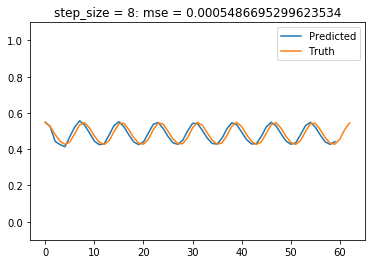

truth_data shape = torch.Size([10, 500, 2, 2])
data shape =  torch.Size([10, 500, 1, 1])
truth_data shape =  torch.Size([10, 500, 2, 2])
y_preds shape = (10, 60)
truth_with_step_size shape = torch.Size([10, 63, 2, 2])
truth_with_step_size[:, :-3] shape = torch.Size([10, 60, 2, 2])
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60, 2, 2])
sizes =  1 2
dim_full =  2
dim_small =  1
dim_full =  2
dim_small =  2
y_pred shape =  (10, 60)
truth_with_step_size[:,3:] shape =  torch.Size([10, 60, 2, 2])


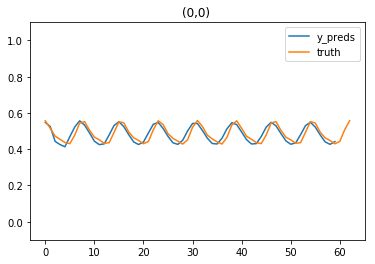

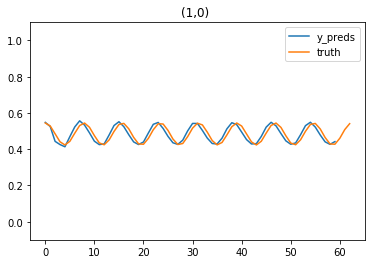

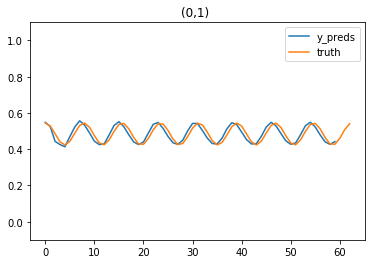

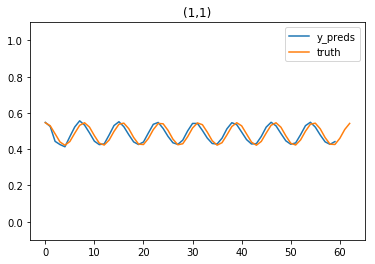

loss shape =  (2, 2)
loss =  [[0.0006561  0.00054855]
 [0.00054855 0.00056073]]


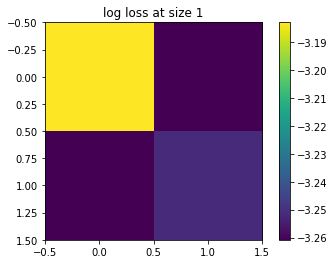

unresolved_list =  tensor([[1., 1.],
        [1., 1.]])
torch.Size([100, 500, 2, 2])


/home/kjohnst/Time_Space_multiscale/src/training_class.py:63: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.unresolved_dict[str(current_size)] = torch.tensor(unresolved_list)


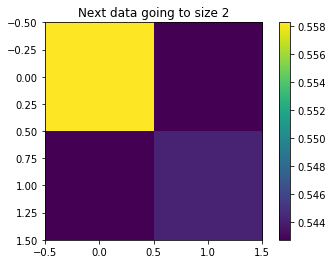

appended
model_used_dict =  {'1': [[2]]}
number of models kept =  3


In [8]:
import training_class as tc
obj, resolved = tc.train_one_step(obj, 1, verbose=True)

In [13]:
import training_class as tc
obj, resolved = tc.train_next_step(obj, 2, verbose=True)

i =  0 : j =  0


NameError: name 'model_keep' is not defined

In [7]:
print(resolved)

False


torch.Size([10, 500, 1, 1])
tensor(8.8689e-05)


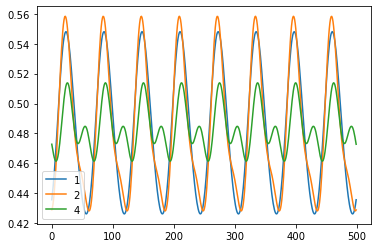

In [76]:
print(val_dict['1'].shape)
plt.plot(val_dict['1'][0,:,0,0], label = '1')
plt.plot(val_dict['2'][0,:,0,0], label = '2')
# plt.ylim([0,1])
mse = torch.mean((val_dict['2'][:,:,0,0] - val_dict['1'][:,:,0,0])**2)
print(mse)
plt.plot(train_dict['4'][0,:,0,0], label = '4')
plt.legend()
# plt.plot(train_dict['8'][0,:,0,0])
# plt.plot(train_dict['16'][0,:,0,0])
# plt.plot(train_dict['32'][0,:,0,0])
# plt.plot(train_dict['64'][0,:,0,0])
# plt.plot(train_dict['128'][0,:,0,0])
# plt.plot(np.cos(np.arange(500)/32*np.pi)/4+.5)

torch.Size([10, 500, 1, 1])
truth_data shape = torch.Size([10, 500, 2, 2])
data shape =  torch.Size([10, 500, 1, 1])
truth_data shape =  torch.Size([10, 500, 2, 2])
y_preds shape = (10, 122)
truth_with_step_size shape = torch.Size([10, 125, 2, 2])
truth_with_step_size[:, :-3] shape = torch.Size([10, 122, 2, 2])
data1 shape = (10, 122)
data2 shape = torch.Size([10, 122, 2, 2])
sizes =  1 2
dim_full =  2
dim_small =  1
dim_full =  2
dim_small =  2
y_pred shape =  (10, 122)
truth_with_step_size[:,3:] shape =  torch.Size([10, 122, 2, 2])


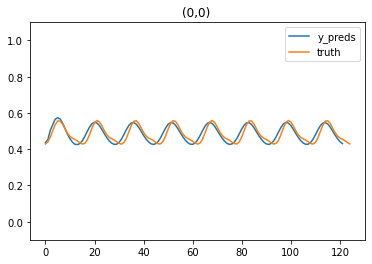

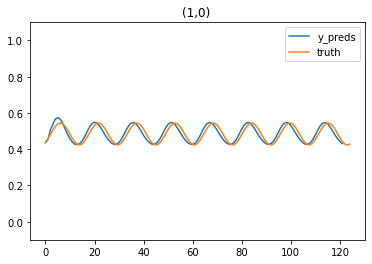

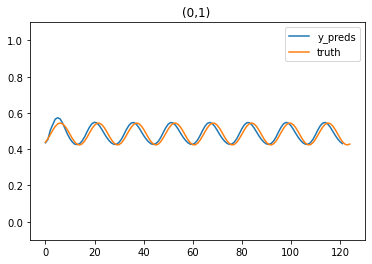

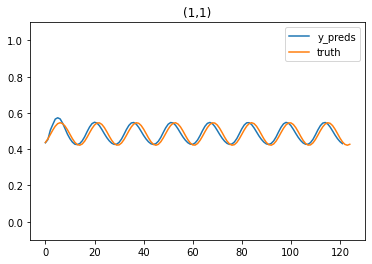

(2, 2)
[[0.00040264 0.00031042]
 [0.00031042 0.00031803]]


In [78]:
import utils
print(val_dict['1'].shape)
resolved, loss, unresolved_list = utils.find_error_4(val_dict['1'][:10], models[idx_lowest], val_dict['2'][:10], plot = True,tol=0.0003)
print(loss.shape)
print(loss)



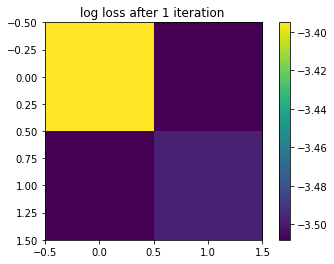

In [80]:
plt.imshow(np.log10(loss))
plt.title("log loss after 1 iteration ")
plt.colorbar()

In [22]:
# print(models[idx_lowest](val_dict['1']).shape)
model = models[idx_lowest]
y_preds, mse_avg = model.predict_mse()
print(mse_avg)
print(model.step_size)
# print(utils.mse(y_preds, val_dict['128'][:,::8,0,0]))
losses = np.zeros((64,64))
for i in range(64):
    print(i)
    for j in range(64):
        truth_with_step_size = val_dict['64'][:,::8,i,j]
        loss = utils.mse(y_preds, truth_with_step_size[:, :-3])
        losses[i,j] = loss

0.002516156858200702
8
0
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
d

/mnt/c/Users/16kat/OneDrive - acornonsite.com/Time_Space_multiscale/src/utils.py:383: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data2 = torch.tensor(data2).unsqueeze(2).unsqueeze(3)


data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small = 

dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = to

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full = 

dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full = 

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
9
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes = 

dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full = 

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small = 

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
16
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1

dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 

dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
23
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([1

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 

data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small = 

dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1

dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
30
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)


data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small = 

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small = 

data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_sm

dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1

dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
42
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1

dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1

data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small = 

dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full = 

dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1

dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = to

data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small = 

dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small = 

data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small = 

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
dat

data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small = 

dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full =  1
dim_small =  1
dim_full =  1
dim_small =  1
data1 shape = (10, 60)
data2 shape = torch.Size([10, 60])
sizes =  1 1
dim_full = 

[[0.01154697 0.01153742 0.01152693 ... 0.01152133 0.01153229 0.01154231]
 [0.01153742 0.01152656 0.01151467 ... 0.01150833 0.01152074 0.01153212]
 [0.01152693 0.01151467 0.01150127 ... 0.01149414 0.01150811 0.01152094]
 ...
 [0.01152133 0.01150833 0.01149414 ... 0.0114866  0.01150139 0.01151498]
 [0.01153229 0.01152075 0.01150811 ... 0.01150139 0.01151457 0.01152665]
 [0.01154231 0.01153212 0.01152094 ... 0.01151498 0.01152665 0.01153734]]
0.013196887127467923


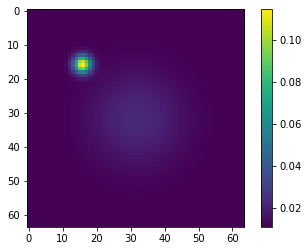

In [23]:
print(losses)
print(np.mean(losses))
plt.imshow(losses)
plt.colorbar()

In [ ]:
plt.imshow(val_dict['2'][0,0])
plt.colorbar()

In [64]:

unresolved_dict[str(current_size)] = torch.tensor(unresolved_list)

print(unresolved_list)

tensor([[1., 1.],
        [1., 1.]])


/tmp/ipykernel_902/3110518613.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  unresolved_dict[str(current_size)] = torch.tensor(unresolved_list)


torch.Size([100, 500, 2, 2])


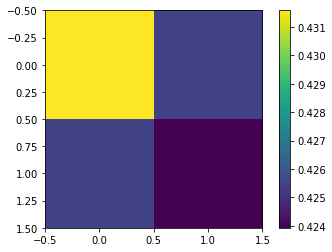

In [65]:
current_size = 1
next_train_data = unresolved_list * train_dict[str(current_size*2)]
print(next_train_data.shape)
plt.imshow(next_train_data[0,0])
plt.colorbar()
plt.show()

In [66]:
model_keep = [models[idx_lowest]]
model_used_dict[str(current_size)] = [[0]]

print(model_used_dict)

{'1': [[0]]}


In [69]:
import utils

current_size = 2
next_train_data = unresolved_list * train_dict[str(current_size)]

model_idx_list = np.ones((current_size, current_size))*(-1) #start with all -1

for i in range(current_size):
    for j in range(current_size):
        print("i = ", i, ": j = ", j)
        data_this = next_train_data[:,:,i,j]
        if (torch.min(data_this) == 0) and (torch.max(data_this) == 0):
            print("zero, no need to train")
            #don't need to do anything is model is resolved
            continue
        else:
        #see if the error is low enough on already made model
            for m, model in enumerate(model_keep):
                loss, resolved = utils.find_error_1(data_this, model,tol=0.0003)
                step_size = model.step_size
                print("model ", m, " has loss = ", loss)
                if resolved:
                    model_idx_list[i,j] = m
                    print("Resolved with loss = ", loss, ": model #", m)
                    break
                else:
                    pass
            if not resolved:
                print("not resolved, fitting new model")
                k = int(np.log2(step_size))
                #if no model good, train new model
                models, step_sizes, mse_list, idx_lowest, n_forward_list = utils.find_best_timestep(train_dict[str(current_size)][:,:,i,j], 
                                                              val_dict[str(current_size)][:,:,i,j], 
                                                              val_dict[str(current_size)][:,:,i,j], current_size,model_dir=model_dir,#make_new = True,
                                                              i=i, j=j, start_k = 2, largest_k =3)#, dont_train=False)
                
                model_keep.append(models[idx_lowest])
                model_idx_list[i,j] = len(model_keep)-1
model_used_dict[str(current_size)] = model_idx_list

i =  0 : j =  0
model  0  has loss =  0.00022145540860947223
Resolved with loss =  0.00022145540860947223 : model # 0
i =  0 : j =  1
model  0  has loss =  0.0004425393350175
model  1  has loss =  0.0002630352554774618
Resolved with loss =  0.0002630352554774618 : model # 1
i =  1 : j =  0
model  0  has loss =  0.00044253936230234105
model  1  has loss =  0.00026303311449282774
Resolved with loss =  0.00026303311449282774 : model # 1
i =  1 : j =  1
model  0  has loss =  0.0004740664877317613
model  1  has loss =  0.0002897849605687952
Resolved with loss =  0.0002897849605687952 : model # 1


In [70]:
print(model_idx_list)
print(len(model_keep))
print(model_used_dict)

[[0. 1.]
 [1. 1.]]
2
{'1': [[0]], '2': array([[0., 1.],
       [1., 1.]])}


0.0
../model/toy3a/model_L1_D4_noise0.pt
truth_data shape = torch.Size([10, 500, 2, 2])
data shape =  torch.Size([2, 2, 1, 1])
truth_data shape =  torch.Size([10, 500, 2, 2])
y_preds shape = (10, 122)
truth_with_step_size shape = torch.Size([10, 125, 2, 2])
truth_with_step_size[:, :-3] shape = torch.Size([10, 122, 2, 2])
data1 shape = (10, 122)
data2 shape = torch.Size([10, 122, 2, 2])
sizes =  1 2
dim_full =  2
dim_small =  1
dim_full =  2
dim_small =  2
y_pred shape =  (10, 122)
truth_with_step_size[:,3:] shape =  torch.Size([10, 122, 2, 2])


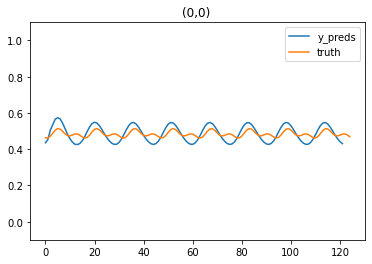

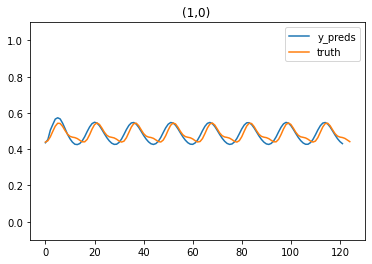

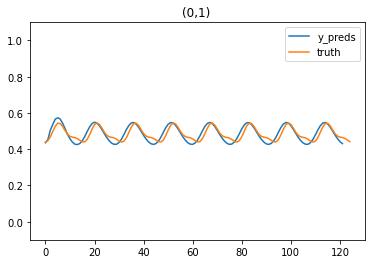

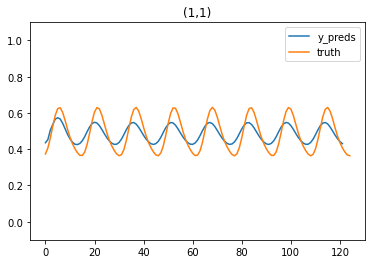

[[0.00118092 0.00045659]
 [0.00045659 0.00315704]]
tensor([[1., 1.],
        [1., 1.]])
1.0
../model/toy3a/model_L2_D4_noise0_i0_j1.pt
truth_data shape = torch.Size([10, 500, 2, 2])
data shape =  torch.Size([2, 2, 1, 1])
truth_data shape =  torch.Size([10, 500, 2, 2])
y_preds shape = (10, 122)
truth_with_step_size shape = torch.Size([10, 125, 2, 2])
truth_with_step_size[:, :-3] shape = torch.Size([10, 122, 2, 2])
data1 shape = (10, 122)
data2 shape = torch.Size([10, 122, 2, 2])
sizes =  1 2
dim_full =  2
dim_small =  1
dim_full =  2
dim_small =  2
y_pred shape =  (10, 122)
truth_with_step_size[:,3:] shape =  torch.Size([10, 122, 2, 2])


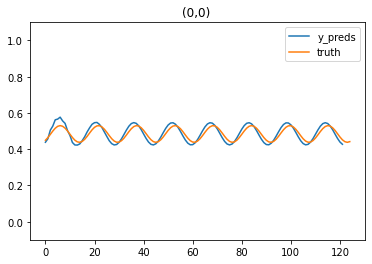

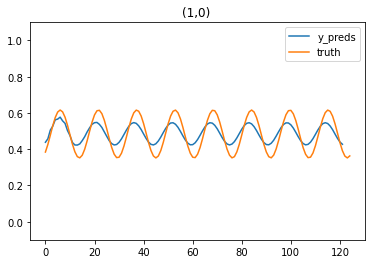

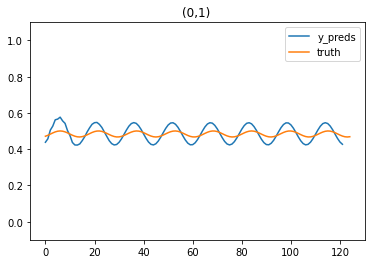

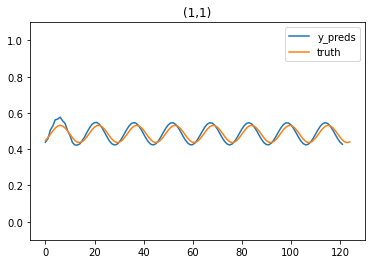

[[0.00033719 0.00109005]
 [0.00309934 0.00032187]]
tensor([[1., 1.],
        [1., 1.]])
1.0
../model/toy3a/model_L2_D4_noise0_i0_j1.pt
truth_data shape = torch.Size([10, 500, 2, 2])
data shape =  torch.Size([2, 2, 1, 1])
truth_data shape =  torch.Size([10, 500, 2, 2])
y_preds shape = (10, 122)
truth_with_step_size shape = torch.Size([10, 125, 2, 2])
truth_with_step_size[:, :-3] shape = torch.Size([10, 122, 2, 2])
data1 shape = (10, 122)
data2 shape = torch.Size([10, 122, 2, 2])
sizes =  1 2
dim_full =  2
dim_small =  1
dim_full =  2
dim_small =  2
y_pred shape =  (10, 122)
truth_with_step_size[:,3:] shape =  torch.Size([10, 122, 2, 2])


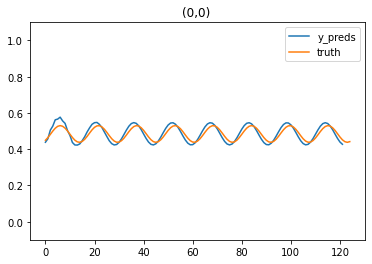

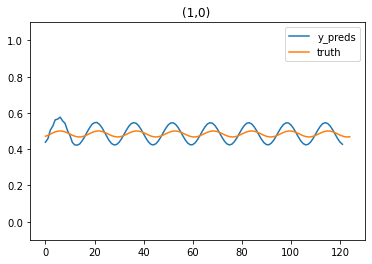

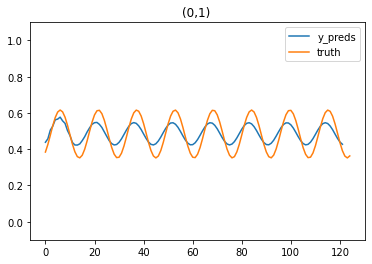

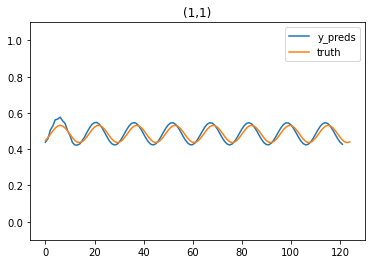

[[0.00033719 0.00309934]
 [0.00109005 0.00032187]]
tensor([[1., 1.],
        [1., 1.]])
1.0
../model/toy3a/model_L2_D4_noise0_i0_j1.pt
truth_data shape = torch.Size([10, 500, 2, 2])
data shape =  torch.Size([2, 2, 1, 1])
truth_data shape =  torch.Size([10, 500, 2, 2])
y_preds shape = (10, 122)
truth_with_step_size shape = torch.Size([10, 125, 2, 2])
truth_with_step_size[:, :-3] shape = torch.Size([10, 122, 2, 2])
data1 shape = (10, 122)
data2 shape = torch.Size([10, 122, 2, 2])
sizes =  1 2
dim_full =  2
dim_small =  1
dim_full =  2
dim_small =  2
y_pred shape =  (10, 122)
truth_with_step_size[:,3:] shape =  torch.Size([10, 122, 2, 2])


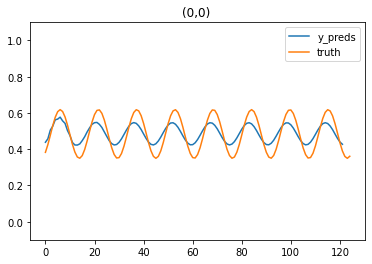

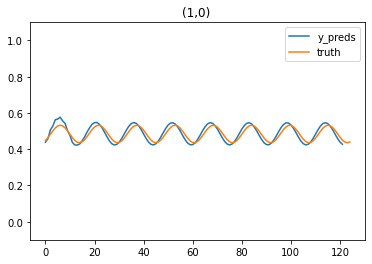

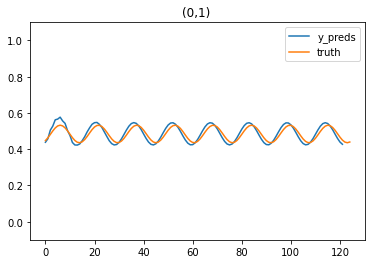

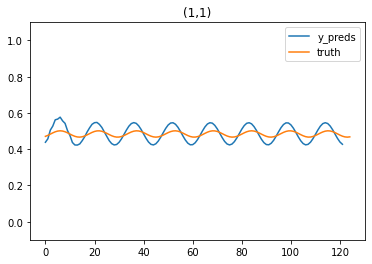

[[0.00326323 0.00031495]
 [0.00031495 0.00105703]]
tensor([[1., 1.],
        [1., 1.]])
all_resolved =  False
unresolved_list_big =  [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
loss_big =  [[0.00118092 0.00045659 0.00033719 0.00109005]
 [0.00045659 0.00315704 0.00309934 0.00032187]
 [0.00033719 0.00309934 0.00326323 0.00031495]
 [0.00109005 0.00032187 0.00031495 0.00105703]]


Text(0.5, 1.0, 'log(loss)')

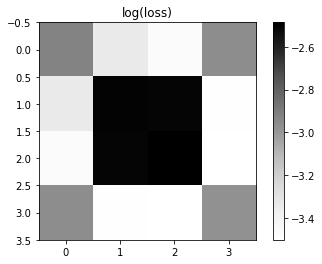

In [72]:
import utils
tol = 0.0003
#once we have all 4 figured out, need to check the errors on the 2x2 of the 2x2s (the 4x4)
unresolved_list_big = np.ones((4,4))*(-1)
loss_big = np.ones((4,4))*(-1)
all_resolved = True
for i in range(2):
    for j in range(2):
        print(model_used_dict['2'][i][j])
        model = model_keep[int(model_used_dict['2'][i][j])]
        print(model.model_name)
        data_next = val_dict['4'][:,:, i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size]
        resolved, loss, unresolved_list = utils.find_error_4(val_dict['2'][i,j], model, data_next,plot = True, tol=tol)
        unresolved_list_big[i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size] = unresolved_list
        loss_big[i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size] = loss
        if not resolved:
            all_resolved = False
        print(loss)
        print(unresolved_list)
print("all_resolved = ", all_resolved)
print("unresolved_list_big = ", unresolved_list_big)
print("loss_big = ", loss_big)
plt.imshow(np.log10(loss_big),cmap='Greys')
plt.colorbar()
plt.title("log(loss)")

In [ ]:
#doing next refine, should be perfect here. 
import utils


current_size = 4
print("unresolved_list = ", unresolved_list)
next_train_data = torch.tensor(unresolved_list_big) * train_dict[str(current_size)]

model_idx_list = np.ones((current_size, current_size))*(-1) #start with all -1

for i in range(current_size):
    for j in range(current_size):
        print("i = ", i, ": j = ", j)
        data_this = next_train_data[:,:,i,j]
        if (torch.min(data_this) == 0) and (torch.max(data_this) == 0):
            print("zero, no need to train")
            #don't need to do anything is model is resolved
            continue
        else:
        #see if the error is low enough on already made model
            for m, model in enumerate(model_keep):
                loss, resolved = utils.find_error_1(data_this, model)
                step_size = model.step_size
                print("model ", m, " has loss = ", loss)
                if resolved:
                    model_idx_list[i,j] = m
                    print("Resolved with loss = ", loss, ": model #", m)
                    break
                else:
                    pass
            if not resolved:
                print("not resolved, fitting new model")
                k = int(np.log2(step_size))
                #if no model good, train new model
                models, step_sizes, mse_list, idx_lowest, n_forward_list = utils.find_best_timestep(train_dict[str(current_size)][:,:,i,j], 
                                                              val_dict[str(current_size)][:,:,i,j], 
                                                              val_dict[str(current_size)][:,:,i,j], current_size,model_dir=model_dir,#make_new = True,
                                                              i=i, j=j, start_k = max(0,k-1), largest_k = k+2)#, dont_train=False)
                
                model_keep.append(models[idx_lowest])
                model_idx_list[i,j] = len(model_keep)-1
model_used_dict[str(current_size)] = model_idx_list

In [ ]:
print(model_idx_list)
print(len(model_keep))
print(model_used_dict)

import utils
tol = 2.5e-2
#once we have all 4 figured out, need to check the errors on the 2x2 of the 2x2s (the 4x4)
unresolved_list_big = np.ones((current_size, current_size))*(-1)
all_resolved = True
for i in range(1):
    for j in range(1):
        print(model_used_dict[str(current_size)][i][j])
        model = model_keep[int(model_used_dict[str(current_size)][i][j])]
        print(model.model_name)
        data_next = val_dict[str(current_size)][:,:, i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size]
        print("data next shape = ", data_next.shape)
        resolved, loss, unresolved_list = utils.find_error_4(val_dict[str(current_size)][i,j], model, data_next,plot = True, tol=tol)
        unresolved_list_big[i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size] = unresolved_list
        if not resolved:
            all_resolved = False
        print(loss)
        print("unresolved_list= ", unresolved_list)
print("all_resolved = ", all_resolved)
print("unresolved_list_big = ", unresolved_list_big)

In [ ]:
import utils
model_slow = model_keep[3]
data = val_dict['2'][:,:, 1,1]
utils.find_error_1(data, model_slow, tol=2e-2, plot=True, title="Slow timescale")

model_slow = model_keep[0]
data = val_dict['1'][:,:, 0,0]
utils.find_error_1(data, model_slow, tol=2e-2, plot=True, title="step 1")


model_slow = model_keep[1]
data = val_dict['2'][:,:, 0,0]
utils.find_error_1(data, model_slow, tol=2e-2, plot=True, title="step 2 on split block")

model_fast = model_keep[6]
data = val_dict['4'][:,:, 1,1]
utils.find_error_1(data, model_fast, tol=2e-2, plot=True, title = "Fast timescale")

In [ ]:
print(step_sizes, mse_list, idx_lowest)
resolved, loss, unresolved_list = utils.find_error_4(val_dict[str(current_size)][:,:,i,j], 
                                                               models[idx_lowest], 
                                                               val_dict[str(current_size*2)][:,:, i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size])
print(loss)    

In [ ]:
model =  models[idx_lowest]
print(idx_lowest)
n_timesteps = 500
n_points = 10
dim = 1
# plt.plot(model(val_dict[str(current_size)][:,:,i,j].unsqueeze(2).unsqueeze(3))[0,:,0,0].detach().numpy(), label = "predicted")
print(val_dict[str(current_size)][:,0,i,j].unsqueeze(1).shape)
val_data_this = val_dict[str(current_size)][:,0,i,j].unsqueeze(1)
predicted = model.uni_scale_forecast(val_data_this, n_steps=n_timesteps-1)
print(predicted.shape)
predicted_reshape = predicted.reshape((  n_points, n_timesteps-1, dim,dim))
plt.plot(predicted_reshape[0,:,0], label = "predicted")
print(val_dict[str(current_size*2)][:,:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size].shape)
# plt.plot(val_dict[str(current_size*2)][:,1:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size][0,:,0,0], label = "Truth")

plt.plot(val_dict[str(current_size*2)][:,1:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size][0,:,0,1], label = "Truth")
plt.legend()

In [ ]:
plt.imshow(val_dict[str(current_size*2)][0,0])
plt.colorbar()

In [ ]:
step_size = (16+32)/2
print(step_size)
model = train_one_timestep(int(28), train_dict[str(current_size)][:,:,i,j].unsqueeze(2), 
                           val_dict[str(current_size)][:,:,i,j].unsqueeze(2), 
                           val_dict[str(current_size)][:,:,i,j].unsqueeze(2), current_size)
#                        dt = 1, n_forward = 5, noise=0, make_new = False, dont_train = True, 
#                        lr = 1e-3, max_epochs = 10000, batch_size = 50,threshold = 1e-4, 
#                        model_dir = './models/toy2',i=None, j = None):
    
#     train_dict[str(current_size)][:,:,i,j], 
#                                                               val_dict[str(current_size)][:,:,i,j], 
#                                                               val_dict[str(current_size)][:,:,i,j], current_size,model_dir=model_dir, 
#                                                               i=i, j=j, start_k = max(0,k-1), largest_k = k+2)

In [ ]:
i = 0
j = 1
resolved, loss, unresolved_list = find_error_4(val_dict[str(current_size)][:,:,i,j], 
                                                               model, 
                                                               val_dict[str(current_size*2)][:,:, i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size])
print(loss)

In [ ]:
# model =  models[idx_lowest]
print(idx_lowest)
n_timesteps = 500
n_points = 10
dim = 1
# plt.plot(model(val_dict[str(current_size)][:,:,i,j].unsqueeze(2).unsqueeze(3))[0,:,0,0].detach().numpy(), label = "predicted")
print(val_dict[str(current_size)][:,0,i,j].unsqueeze(1).shape)
val_data_this = val_dict[str(current_size)][:,0,i,j].unsqueeze(1)
predicted = model.uni_scale_forecast(val_data_this, n_steps=n_timesteps-1)
print(predicted.shape)
predicted_reshape = predicted.reshape((  n_points, n_timesteps-1, dim,dim))
plt.plot(predicted_reshape[0,:,0], label = "predicted")
print(val_dict[str(current_size*2)][:,:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size].shape)
# plt.plot(val_dict[str(current_size*2)][:,1:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size][0,:,0,0], label = "Truth")

plt.plot(val_dict[str(current_size*2)][:,1:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size][0,:,0,1], label = "Truth")
plt.legend()